# Лабораторна робота №2
## з дисципліни "Чисельні методи"

##### За темою: "Чисельні методи розв'язання СЛАР"

##### Виконав: студент групи КА-12 Гавлицький Іван
##### Перевірила: Димитрієва О. А.

##### *Мета роботи:* придбання практичних навичок в застосуванні чисельних методів розв’язання систем лінійних алгебраїчних рівнянь. Визначення трудомісткості застосованих методів і швидкості збіжності ітераційного процесу, проведення порівняльного аналізу щодо обрання кращого методу розв’язання.

## Варіант 38

##### Згенерувати систему лінійних алгебраїчних рівнянь в якості індивідуального варіанту завдання.

$$ 
\begin{cases}
        0.3(n + 1)x_1 - 0.2mx_2 + 1.1kx_3 - 0.4ix_4 + 1.5(30 + j)x_5 - 0.15gx_6 = l\\
        0.21(40 + n)x_1 + 0.35mx_2 - 2.1kx_3 - 0.3ix_4 - 4.5jx_5 + 0.15gx_6 = -k\\
        1.1nx_1 - 0.5mx_2 + 1.4kx_3 - 0.21(54 + i)x_4 + 0.5x_5 - 0.75gx_6 = n\\
        5.2nx_1 + 0.1mx_2 - 0.2(40 + k)x_3 + 0.1ix_4 - 1.25jx_5 - 1.05gx_6 = -m\\
        0.1nx_1 - 0.9(50 + m)x_2 + 1.04kx_3 - 0.4ix_4 + 0.8x_5 - 0.12gx_6 = i\\
        0.62x_1 + 0.3mx_2 - 1.8kx_3 - 0.41ix_4 + 2.5jx_5 + 0.2(61 + g)x_6 = j
\end{cases}
$$

##### n – наскрізний номер варіанту у загальному списку академічних груп,
##### m – друга цифра наскрізного номеру варіанту у загальному списку академічних груп,
##### l – третя цифра наскрізного номеру варіанту у загальному списку академічних груп,
##### k – сума другої і третьої цифр наскрізного номеру варіанту у загальному списку академічних груп,
##### i – різниця другої і першої цифр номера за переліком варіантів у загальному списку академічних груп + 2,
##### j – модуль різниці першої і третьої цифр номера за переліком варіантів у загальному списку академічних груп,
##### g – відношення другої до (третьої + 1) цифри номера за переліком варіантів у загальному списку академічних груп.

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

### Згенеруємо СЛАУ для варіанту 49

In [2]:
def get_variant(variant):
    nn = int(variant)
    mm = int(variant[1])
    ll = int(variant[2])
    kk = int(variant[1]) + int(variant[2])
    ii = int(variant[1]) - int(variant[0]) + 2
    jj = np.abs(int(variant[0]) - int(variant[2]))
    gg = int(variant[1]) / (int(variant[2]) + 1)   
    return np.array([
        [   0.3*(nn + 1),        -0.2*mm,         1.1*kk,         -0.4*ii, 1.5*(30 + jj),      -0.15*gg], 
        [ 0.21*(40 + nn),        0.35*mm,        -2.1*kk,         -0.3*ii,       -4.5*jj,       0.15*gg], 
        [         1.1*nn,        -0.5*mm,         1.4*kk, -0.21*(54 + ii),           0.5,      -0.75*gg], 
        [         5.2*nn,         0.1*mm, -0.2*(40 + kk),          0.1*ii,      -1.25*jj,      -1.05*gg], 
        [         0.1*nn, -0.9*(50 + mm),        1.04*kk,         -0.4*ii,           0.8,      -0.12*gg], 
        [           0.62,         0.3*mm,        -1.8*kk,        -0.41*ii,        2.5*jj, 0.2*(61 + gg)]
    ]), np.array([ll, -kk, nn, -mm, ii, jj])
    

A, b = get_variant('038')
print(A)

[[ 1.17000000e+01 -6.00000000e-01  1.21000000e+01 -2.00000000e+00
   5.70000000e+01 -5.00000000e-02]
 [ 1.63800000e+01  1.05000000e+00 -2.31000000e+01 -1.50000000e+00
  -3.60000000e+01  5.00000000e-02]
 [ 4.18000000e+01 -1.50000000e+00  1.54000000e+01 -1.23900000e+01
   5.00000000e-01 -2.50000000e-01]
 [ 1.97600000e+02  3.00000000e-01 -1.02000000e+01  5.00000000e-01
  -1.00000000e+01 -3.50000000e-01]
 [ 3.80000000e+00 -4.77000000e+01  1.14400000e+01 -2.00000000e+00
   8.00000000e-01 -4.00000000e-02]
 [ 6.20000000e-01  9.00000000e-01 -1.98000000e+01 -2.05000000e+00
   2.00000000e+01  1.22666667e+01]]


In [3]:
b

array([  8, -11,  38,  -3,   5,   8])

##### Представимо матрицю у вигляді СЛАУ:
$$ 
\begin{cases}
        17x_1 - 0.6x_2 + 12.1x_3 - 2x_4 + 57x_5 - 0.05x_6 = 8\\
        16.38x_1 + 1.05x_2 - 23.1x_3 - 1.5x_4 - 36x_5 + 0.05x_6 = -11\\
        41.8x_1 - 1.5x_2 + 15.4x_3 - 12.39x_4 + 0.5x_5 - 0.25x_6 = 38\\
        197.6x_1 + 0.3x_2 - 10.2x_3 + 0.5x_4 - 10x_5 - 0.35x_6 = -3\\
        3.8x_1 - 47.7x_2 + 11.44x_3 - 2x_4 + 0.8x_5 - 0.04x_6 = 5\\
        0.62x_1 + 0.9x_2 - 19.8x_3 - 2.05x_4 + 20x_5 + 12.27x_6 = 8
\end{cases}
$$

In [4]:
def get_D(A): # діагональна матриця з діагоналлю A
    diag = np.diag(A)
    return np.diag(diag)

def jacobi_matrices(A, b = 0): # матриця U та f для методу Якобі 
    D = get_D(A)
    D_inv = scp.linalg.inv(D)

    Q = -1*D_inv.dot(A - D)
    f = D_inv.dot(b)
    return Q, f

### Перевіримо умову збіжності. У разі невиконання - штучно приведемо матрицю до вигляду з діагональним перевершенням

##### Виконаємо перевірку обчисливши норму матриці B

In [5]:
def jacobi_check(A):
    Q, _ = jacobi_matrices(A)
    norm = scp.linalg.norm(Q, np.inf)
    return norm < 1, norm

jacobi_check(A)

(False, 436.9)

##### Норма більше 1, тому приводимо матрицю до діагонального перевершення


In [6]:
# Матриця перестановок
P = np.zeros_like(A)
P[[0, 1, 2, 3, 4, 5], [3, 4, 1, 2, 0, 5]] = 1

A = P.dot(A)
print(A)

[[ 1.97600000e+02  3.00000000e-01 -1.02000000e+01  5.00000000e-01
  -1.00000000e+01 -3.50000000e-01]
 [ 3.80000000e+00 -4.77000000e+01  1.14400000e+01 -2.00000000e+00
   8.00000000e-01 -4.00000000e-02]
 [ 1.63800000e+01  1.05000000e+00 -2.31000000e+01 -1.50000000e+00
  -3.60000000e+01  5.00000000e-02]
 [ 4.18000000e+01 -1.50000000e+00  1.54000000e+01 -1.23900000e+01
   5.00000000e-01 -2.50000000e-01]
 [ 1.17000000e+01 -6.00000000e-01  1.21000000e+01 -2.00000000e+00
   5.70000000e+01 -5.00000000e-02]
 [ 6.20000000e-01  9.00000000e-01 -1.98000000e+01 -2.05000000e+00
   2.00000000e+01  1.22666667e+01]]


In [7]:
b = P.dot(b)
print(b)

[ -3.   5. -11.  38.   8.   8.]


##### Тепер СЛАУ має вигляд:

$$ 
\begin{cases}
        197.6x_1 + 0.3x_2 - 10.2x_3 + 0.5x_4 - 10x_5 - 0.35x_6 = -3\\
        3.8x_1 - 47.7x_2 + 11.44x_3 - 2x_4 + 0.8x_5 - 0.04x_6 = 5\\
        16.38x_1 + 1.05x_2 - 23.1x_3 - 1.5x_4 - 36x_5 + 0.05x_6 = -11\\
        41.8x_1 - 1.5x_2 + 15.4x_3 - 12.39x_4 + 0.5x_5 - 0.25x_6 = 38\\
        17x_1 - 0.6x_2 + 12.1x_3 - 2x_4 + 57x_5 - 0.05x_6 = 8\\
        0.62x_1 + 0.9x_2 - 19.8x_3 - 2.05x_4 + 20x_5 + 12.27x_6 = 8
\end{cases}
$$

##### Можемо помітити, що матриця не виконує умову діагонального перевершення, тому штучно перетворимо її

In [8]:
def diagonally_dominant(A): # діагонально перевершена матриця
    for ii in range(A.shape[0]):
        row_sum_abs = np.sum(np.abs(A[ii]))
        if row_sum_abs > 2 * abs(A[ii, ii]):
            A[ii, ii] += A[ii, ii]/abs(A[ii, ii]) * (row_sum_abs - abs(A[ii, ii]) + 1)

    return A

A = diagonally_dominant(A)
print(A)

[[ 1.97600000e+02  3.00000000e-01 -1.02000000e+01  5.00000000e-01
  -1.00000000e+01 -3.50000000e-01]
 [ 3.80000000e+00 -4.77000000e+01  1.14400000e+01 -2.00000000e+00
   8.00000000e-01 -4.00000000e-02]
 [ 1.63800000e+01  1.05000000e+00 -7.90800000e+01 -1.50000000e+00
  -3.60000000e+01  5.00000000e-02]
 [ 4.18000000e+01 -1.50000000e+00  1.54000000e+01 -7.28400000e+01
   5.00000000e-01 -2.50000000e-01]
 [ 1.17000000e+01 -6.00000000e-01  1.21000000e+01 -2.00000000e+00
   5.70000000e+01 -5.00000000e-02]
 [ 6.20000000e-01  9.00000000e-01 -1.98000000e+01 -2.05000000e+00
   2.00000000e+01  5.66366667e+01]]


##### Виконаємо перевірку обчисливши норму матриці B

In [9]:
jacobi_check(A)

(True, 0.8161724327292696)

##### Маємо матрицю у діагонально перевершеному вигляді

##### У вигляді СЛАУ:

$$ 
\begin{cases}
        197.6x_1 + 0.3x_2 - 10.2x_3 + 0.5x_4 - 10x_5 - 0.35x_6 = -3\\
        3.8x_1 - 47.7x_2 + 11.44x_3 - 2x_4 + 0.8x_5 - 0.04x_6 = 5\\
        16.38x_1 + 1.05x_2 - 79.08x_3 - 1.5x_4 - 36x_5 + 0.05x_6 = -11\\
        41.8x_1 - 1.5x_2 + 15.4x_3 - 72.84x_4 + 0.5x_5 - 0.25x_6 = 38\\
        17x_1 - 0.6x_2 + 12.1x_3 - 2x_4 + 57x_5 - 0.05x_6 = 8\\
        0.62x_1 + 0.9x_2 - 19.8x_3 - 2.05x_4 + 20x_5 + 56.66x_6 = 8
\end{cases}
$$

##### Розв'яжемо матрицю вбудованим методом бібліотеки scipy

In [10]:
res = scp.linalg.solve(A, b)
print(res)

[-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.12356258]


### Обчислимо систему точними методами

#### Метод Крамера

In [11]:
def kramers_rule(A, b):
    detA = scp.linalg.det(A)
    x = np.zeros_like(b)
    
    for ii in range(A.shape[0]):
        Aii = A.copy()
        Aii[:, ii] = b
        x[ii] = scp.linalg.det(Aii) / detA
    
    return x
        
print(kramers_rule(A, b))

[-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.12356258]


##### Розв'язок збігається.

#### Метод оберненої матриці

In [12]:
def invertmatrix_method(A, b):
    return scp.linalg.inv(A).dot(b)

print(invertmatrix_method(A, b))

[-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.12356258]


##### Розв'язок збігається.

#### Метод LU-декомпозиції

In [13]:
def ludecomp_method(A, b):
    P, L, U = scp.linalg.lu(A)
    tmp = scp.linalg.inv(L).dot(P.dot(b))
    return scp.linalg.inv(U).dot(tmp)

print(ludecomp_method(A, b))   

[-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.12356258]


##### Розв'язок збігається.

### Обчислимо систему ітераційними методами

#### Метод Якобі

In [14]:
def jacobi_method(A, b, eps, x_0 = np.empty((0,2))):
    Q, f = jacobi_matrices(A, b)
    kk = 0
    
    if np.size(x_0) == 0:
        x_0 = f.copy()
    
    eps_k = 10
    while eps_k > eps:
        x_k = Q.dot(x_0) + f

        eps_k = np.abs(x_k - x_0).max()
        x_0 = x_k.copy()
        kk += 1
        
        print(f'Iter № {kk} \neps_{kk} = {eps_k} \nx_{kk} = {x_0}')

    
    return x_0, kk


##### Розв'яжемо систему методом Якобі для різних $\varepsilon$:
##### $\varepsilon$ = 0.1

In [15]:
res, kk = jacobi_method(A, b, 0.1)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.058444348159800624 
x_1 = [ 0.00083024 -0.0485614   0.0806553  -0.49835785  0.09465461  0.12326715]
Result: [ 0.00083024 -0.0485614   0.0806553  -0.49835785  0.09465461  0.12326715]
Expected: [-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.12356258]
Iter quantity 1


##### Отриманий розв'язок має точність до 0.1, як і мало бути
##### Перевіримо для $\varepsilon$ = 0.01

In [16]:
res, kk = jacobi_method(A, b, 0.01)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.058444348159800624 
x_1 = [ 0.00083024 -0.0485614   0.0806553  -0.49835785  0.09465461  0.12326715]
Iter № 2 
eps_2 = 0.02441228103424066 
x_2 = [-0.0046755  -0.06303228  0.10506758 -0.50293591  0.10516961  0.1187471 ]
Iter № 3 
eps_3 = 0.0060353764377610725 
x_3 = [-0.00285767 -0.05724394  0.0990322  -0.50054845  0.10080056  0.12369293]
Result: [-0.00285767 -0.05724394  0.0990322  -0.50054845  0.10080056  0.12369293]
Expected: [-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.12356258]
Iter quantity 3


##### Отриманий розв'язок має точність до 0.01 окрім $x_3$. Можливо, що така помилка обумовлена округленням, оскільки очікувана відповідь має бути 0.10
##### Перевіримо для $\varepsilon$ = 0.001

In [17]:
res, kk = jacobi_method(A, b, 0.001)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.058444348159800624 
x_1 = [ 0.00083024 -0.0485614   0.0806553  -0.49835785  0.09465461  0.12326715]
Iter № 2 
eps_2 = 0.02441228103424066 
x_2 = [-0.0046755  -0.06303228  0.10506758 -0.50293591  0.10516961  0.1187471 ]
Iter № 3 
eps_3 = 0.0060353764377610725 
x_3 = [-0.00285767 -0.05724394  0.0990322  -0.50054845  0.10080056  0.12369293]
Iter № 4 
eps_4 = 0.00240017561032696 
x_4 = [-0.00339639 -0.05872413  0.10143238 -0.50094744  0.10185766  0.12310035]
Iter № 5 
eps_5 = 0.0006052742639159614 
x_5 = [-0.00321679 -0.05815645  0.1008271  -0.50070937  0.10142862  0.12358113]
Result: [-0.00321679 -0.05815645  0.1008271  -0.50070937  0.10142862  0.12358113]
Expected: [-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.12356258]
Iter quantity 5


##### Отриманий розв'язок має точність до 0.001. Як можемо помітити, результат $x_3$ все ще не збігається з очікуваним
##### Перевіримо для $\varepsilon$ = $10^{-6}$

In [18]:
res, kk = jacobi_method(A, b, 0.000001)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.058444348159800624 
x_1 = [ 0.00083024 -0.0485614   0.0806553  -0.49835785  0.09465461  0.12326715]
Iter № 2 
eps_2 = 0.02441228103424066 
x_2 = [-0.0046755  -0.06303228  0.10506758 -0.50293591  0.10516961  0.1187471 ]
Iter № 3 
eps_3 = 0.0060353764377610725 
x_3 = [-0.00285767 -0.05724394  0.0990322  -0.50054845  0.10080056  0.12369293]
Iter № 4 
eps_4 = 0.00240017561032696 
x_4 = [-0.00339639 -0.05872413  0.10143238 -0.50094744  0.10185766  0.12310035]
Iter № 5 
eps_5 = 0.0006052742639159614 
x_5 = [-0.00321679 -0.05815645  0.1008271  -0.50070937  0.10142862  0.12358113]
Iter № 6 
eps_6 = 0.00023583730840245898 
x_6 = [-0.00327036 -0.05830489  0.10106294 -0.50075056  0.101535    0.12351866]
Iter № 7 
eps_7 = 6.074993706881027e-05 
x_7 = [-0.00325258 -0.05824903  0.10100219 -0.50072744  0.10149287  0.123565  ]
Iter № 8 
eps_8 = 2.3193655632108845e-05 
x_8 = [-0.00325791 -0.0582639   0.10102538 -0.50073168  0.10150355  0.12355839]
Iter № 9 
eps_9 = 6.090179938300633

##### Отриманий розв'язок має точність до $10^{-6}$, проте проблеми з $x_3$ ми не позбулися. Для цієї точності спробуємо обрати інші початкові наближення
##### Візьмемо за $x_0$ одиничний вектор

In [19]:
x_0 = np.ones_like(res)
res, kk = jacobi_method(A, b, 0.000001, x_0)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 1.2307017543859649 
x_1 = [ 0.08476721  0.18867925 -0.11406171  0.24643053 -0.23070175  0.14707786]
Iter № 2 
eps_2 = 0.749566451253669 
x_2 = [-0.03339468 -0.1397496   0.2596051  -0.50313592  0.15792619  0.18783642]
Iter № 3 
eps_3 = 0.19150936287493225 
x_3 = [ 0.00802869 -0.0216335   0.06809574 -0.48265171  0.07313625  0.16061517]
Iter № 4 
eps_4 = 0.04834202356848073 
x_4 = [-0.00642728 -0.06652176  0.11643776 -0.5022908   0.10722549  0.12201684]
Iter № 5 
eps_5 = 0.018760817656618273 
x_5 = [-0.00215725 -0.05465187  0.09767694 -0.49907506  0.09873524  0.12703989]
Iter № 6 
eps_6 = 0.004849308091923826 
x_6 = [-0.0035726  -0.05909259  0.10252625 -0.50091107  0.1020835   0.12336035]
Iter № 7 
eps_7 = 0.0018438762861318625 
x_7 = [-0.00314796 -0.0579061   0.10068237 -0.50057098  0.10123021  0.12389289]
Iter № 8 
eps_8 = 0.00048604203283127145 
x_8 = [-0.00328805 -0.05834351  0.10116842 -0.50074925  0.10155936  0.12353841]
Iter № 9 
eps_9 = 0.00018150503197257584 
x_

##### Розглянемо $x_0 = 0$

In [20]:
x_0 = np.zeros_like(res)
res, kk = jacobi_method(A, b, 0.000001, x_0)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.5216913783635365 
x_1 = [-0.01518219 -0.1048218   0.13909965 -0.52169138  0.14035088  0.14125125]
Iter № 2 
eps_2 = 0.058444348159800624 
x_2 = [ 0.00083024 -0.0485614   0.0806553  -0.49835785  0.09465461  0.12326715]
Iter № 3 
eps_3 = 0.02441228103424066 
x_3 = [-0.0046755  -0.06303228  0.10506758 -0.50293591  0.10516961  0.1187471 ]
Iter № 4 
eps_4 = 0.0060353764377610725 
x_4 = [-0.00285767 -0.05724394  0.0990322  -0.50054845  0.10080056  0.12369293]
Iter № 5 
eps_5 = 0.00240017561032696 
x_5 = [-0.00339639 -0.05872413  0.10143238 -0.50094744  0.10185766  0.12310035]
Iter № 6 
eps_6 = 0.0006052742639159614 
x_6 = [-0.00321679 -0.05815645  0.1008271  -0.50070937  0.10142862  0.12358113]
Iter № 7 
eps_7 = 0.00023583730840245898 
x_7 = [-0.00327036 -0.05830489  0.10106294 -0.50075056  0.101535    0.12351866]
Iter № 8 
eps_8 = 6.074993706881027e-05 
x_8 = [-0.00325258 -0.05824903  0.10100219 -0.50072744  0.10149287  0.123565  ]
Iter № 9 
eps_9 = 2.3193655632108845e-0

##### Розглянемо "поганий варіант" початкового наближення

In [21]:
x_0 = np.ones_like(res) * 300
res, kk = jacobi_method(A, b, 0.000001, x_0)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 411.17543859649123 
x_1 = [  29.96963563   87.94549266  -75.80930703  229.91488193 -111.1754386
    1.88923548]
Iter № 2 
eps_2 = 231.84666153494996 
x_2 = [-10.26664562 -27.40502183  53.76559594  -1.9317796   19.07612982
  19.49404773]
Iter № 3 
eps_3 = 64.75208089171764 
x_3 = [  3.80658244  12.35660095 -10.98648495   5.58232395  -9.50483907
  12.67916947]
Iter № 4 
eps_4 = 16.307184625434786 
x_4 = [-1.07373973 -2.84058827  5.32069968 -1.0232542   2.02828106 -0.37913387]
Iter № 5 
eps_5 = 6.345897804473246 
x_5 = [ 0.36834542  1.16295371 -1.02519813  0.0607669  -0.83486894  1.30496397]
Iter № 6 
eps_6 = 1.6357694324880223 
x_6 = [-0.10996074 -0.33899752  0.61057131 -0.56122074  0.29789141  0.05734793]
Iter № 7 
eps_7 = 0.6236782410518966 
x_7 = [ 0.03344698  0.06133219 -0.01310694 -0.44687611  0.01009922  0.23578815]
Iter № 8 
eps_8 = 0.16397684103296079 
x_8 = [-0.01389238 -0.08659213  0.15086991 -0.50727154  0.12144036  0.11558707]
Iter № 9 
eps_9 = 0.06138641262

##### Як бачимо, у всіх обраних варіантах початкових наближень метод видає правильний результат з наданою точністю, проте за різну кількість ітерацій

#### Метод Зейделя

In [22]:
def seidel_method(A, b, eps, x_0 = np.empty((0,2))):
    Q, f = jacobi_matrices(A, b)
    kk = 0
    
    if np.size(x_0) == 0:
        x_0 = f.copy()
    
    eps_k = 10
    while eps_k > eps:
        eps_k = 0

        for ii in range(Q.shape[0]):
            prev_x_ii = x_0[ii]
            x_0[ii] = Q[ii].dot(x_0) + f[ii]
            eps_k = max(eps_k, abs(prev_x_ii - x_0[ii]))

        kk += 1
        print(f'Iter № {kk} \neps_{kk} = {eps_k} \nx_{kk} = {x_0}')

    
    return x_0, kk

##### Розв'яжемо систему методом Зейделя для різних $\varepsilon$:
##### $\varepsilon$ = 0.1

In [23]:
res, kk = seidel_method(A, b, 0.1)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.05753602239058298 
x_1 = [ 0.00083024 -0.04728578  0.08473593 -0.50184749  0.10421013  0.11665277]
Result: [ 0.00083024 -0.04728578  0.08473593 -0.50184749  0.10421013  0.11665277]
Expected: [-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.12356258]
Iter quantity 1


##### Отриманий розв'язок має точність до 0.1 окрім $x_3$, але, оскільки, ми розглядаємо $\varepsilon$ як різницю між k+1 та k розв'язком, абсолютна похибка може бути більше. 
##### Перевіримо для $\varepsilon$ = 0.01

In [24]:
res, kk = seidel_method(A, b, 0.01)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.05753602239058298 
x_1 = [ 0.00083024 -0.04728578  0.08473593 -0.50184749  0.10421013  0.11665277]
Iter № 2 
eps_2 = 0.014865932802698614 
x_2 = [-0.0039861  -0.06212518  0.09960186 -0.50132648  0.1018835   0.12297884]
Iter № 3 
eps_3 = 0.0035534938964945292 
x_3 = [-0.00330406 -0.05857169  0.1008436  -0.50078341  0.10154191  0.1234893 ]
Result: [-0.00330406 -0.05857169  0.1008436  -0.50078341  0.10154191  0.1234893 ]
Expected: [-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.12356258]
Iter quantity 3


##### Отриманий розв'язок має точність до 0.01. Можемо помітити, що результат $x_3$ також виконує ці вимоги.
##### Перевіримо для $\varepsilon$ = 0.001

In [25]:
res, kk = seidel_method(A, b, 0.001)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.05753602239058298 
x_1 = [ 0.00083024 -0.04728578  0.08473593 -0.50184749  0.10421013  0.11665277]
Iter № 2 
eps_2 = 0.014865932802698614 
x_2 = [-0.0039861  -0.06212518  0.09960186 -0.50132648  0.1018835   0.12297884]
Iter № 3 
eps_3 = 0.0035534938964945292 
x_3 = [-0.00330406 -0.05857169  0.1008436  -0.50078341  0.10154191  0.1234893 ]
Iter № 4 
eps_4 = 0.00027214363277618114 
x_4 = [-0.00326312 -0.05829954  0.10100122 -0.50073629  0.10150502  0.12355436]
Result: [-0.00326312 -0.05829954  0.10100122 -0.50073629  0.10150502  0.12355436]
Expected: [-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.12356258]
Iter quantity 4


##### Отриманий розв'язок має точність до 0.001.
##### Перевіримо для $\varepsilon$ = $10^{-6}$

In [26]:
res, kk = seidel_method(A, b, 0.000001)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.05753602239058298 
x_1 = [ 0.00083024 -0.04728578  0.08473593 -0.50184749  0.10421013  0.11665277]
Iter № 2 
eps_2 = 0.014865932802698614 
x_2 = [-0.0039861  -0.06212518  0.09960186 -0.50132648  0.1018835   0.12297884]
Iter № 3 
eps_3 = 0.0035534938964945292 
x_3 = [-0.00330406 -0.05857169  0.1008436  -0.50078341  0.10154191  0.1234893 ]
Iter № 4 
eps_4 = 0.00027214363277618114 
x_4 = [-0.00326312 -0.05829954  0.10100122 -0.50073629  0.10150502  0.12355436]
Iter № 5 
eps_5 = 3.5619034150877193e-05 
x_5 = [-0.00325726 -0.05826393  0.10101885 -0.50073042  0.10150071  0.12356163]
Iter № 6 
eps_6 = 3.954212400028578e-06 
x_6 = [-0.00325663 -0.05825997  0.10102089 -0.50072976  0.10150022  0.12356247]
Iter № 7 
eps_7 = 4.579130583604041e-07 
x_7 = [-0.00325655 -0.05825951  0.10102112 -0.50072968  0.10150016  0.12356256]
Result: [-0.00325655 -0.05825951  0.10102112 -0.50072968  0.10150016  0.12356256]
Expected: [-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  

##### Отриманий розв'язок має точність до $10^{-6}$. Для цієї точності спробуємо обрати інші початкові наближення
##### Візьмемо за $x_0$ одиничний вектор

In [27]:
x_0 = np.ones_like(res)
res, kk = seidel_method(A, b, 0.000001, x_0)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 1.538676236831221 
x_1 = [ 0.08476721  0.11576762 -0.31537629 -0.53867624  0.17309447 -0.05239314]
Iter № 2 
eps_2 = 0.37930629257200055 
x_2 = [-0.0216074  -0.15664757  0.06393    -0.51598093  0.1114155   0.10830656]
Iter № 3 
eps_3 = 0.09021128475050151 
x_3 = [-0.00450844 -0.06643629  0.0964191  -0.50213225  0.10258538  0.12166336]
Iter № 4 
eps_4 = 0.007138168084275892 
x_4 = [-0.00342658 -0.05929812  0.10050351 -0.50090133  0.10162632  0.12334921]
Iter № 5 
eps_5 = 0.0009225197341688959 
x_5 = [-0.00327525 -0.0583756   0.10096142 -0.50074904  0.10151458  0.12353795]
Iter № 6 
eps_6 = 0.00010272122152023971 
x_6 = [-0.00325872 -0.05827288  0.1010143  -0.5007319   0.10150181  0.12355975]
Iter № 7 
eps_7 = 1.1885622708249222e-05 
x_7 = [-0.00325679 -0.05826099  0.10102036 -0.50072993  0.10150034  0.12356225]
Iter № 8 
eps_8 = 1.3610171771191726e-06 
x_8 = [-0.00325657 -0.05825963  0.10102106 -0.5007297   0.10150018  0.12356254]
Iter № 9 
eps_9 = 1.562841238159085e-0

##### Розглянемо $x_0 = 0$

In [28]:
x_0 = np.zeros_like(res)
res, kk = seidel_method(A, b, 0.000001, x_0)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.49977407266918433 
x_1 = [-0.01518219 -0.10603129  0.13454708 -0.49977407  0.09625342  0.13806017]
Iter № 2 
eps_2 = 0.05579655638927226 
x_2 = [-0.00169569 -0.05023473  0.10383054 -0.49949102  0.10072404  0.12471903]
Iter № 3 
eps_3 = 0.007409497319190654 
x_3 = [-0.00316407 -0.05764423  0.10137902 -0.50062291  0.10141644  0.12371033]
Iter № 4 
eps_4 = 0.0005343433155585858 
x_4 = [-0.00324325 -0.05817857  0.10106115 -0.50071633  0.10149038  0.12357906]
Iter № 5 
eps_5 = 7.191198496896145e-05 
x_5 = [-0.0032551  -0.05825048  0.10102577 -0.50072817  0.10149904  0.12356448]
Iter № 6 
eps_6 = 7.933302091374383e-06 
x_6 = [-0.00325638 -0.05825841  0.10102168 -0.5007295   0.10150003  0.12356279]
Iter № 7 
eps_7 = 9.203233189425397e-07 
x_7 = [-0.00325653 -0.05825934  0.10102121 -0.50072965  0.10150014  0.1235626 ]
Result: [-0.00325653 -0.05825934  0.10102121 -0.50072965  0.10150014  0.1235626 ]
Expected: [-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.12

##### Розглянемо "поганий варіант" початкового наближення

In [29]:
x_0 = np.ones_like(res) * 300
res, kk = seidel_method(A, b, 0.000001, x_0)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 434.84246391880055 
x_1 = [  29.96963563   66.43363974 -134.84246392  -12.17042332   23.14856866
  -56.99793379]
Iter № 2 
eps_2 = 122.97613268532322 
x_2 = [ -5.97521054 -31.97408739 -11.86633123  -5.44646352   3.30816307
  -4.79902114]
Iter № 3 
eps_3 = 29.278825123588447 
x_3 = [-0.40647342 -2.69526226 -1.38659821 -0.95342492  0.45209858 -0.49037822]
Iter № 4 
eps_4 = 2.3012190766347826 
x_4 = [-0.05824219 -0.39404319 -0.06623271 -0.55621635  0.14227144  0.05462308]
Iter № 5 
eps_5 = 0.29825760375638766 
x_5 = [-0.00929868 -0.09578558  0.08171973 -0.50698851  0.10616261  0.11560434]
Iter № 6 
eps_6 = 0.03318842378139318 
x_6 = [-0.0039582  -0.06259716  0.09880939 -0.5014513   0.10203573  0.12265072]
Iter № 7 
eps_7 = 0.0038408634848405288 
x_7 = [-0.00333681 -0.0587563   0.10076722 -0.50081238  0.1015616   0.12345789]
Iter № 8 
eps_8 = 0.0004397938451153188 
x_8 = [-0.00326576 -0.0583165   0.10099201 -0.50073917  0.10150721  0.12355056]
Iter № 9 
eps_9 = 5.05017185

##### Як бачимо, у всіх обраних варіантах початкових наближень метод видає правильний результат з наданою точністю, проте за різну кількість ітерацій

#### Метод релаксації

In [30]:
def relaxation_method(A, b, omega, eps, x_0 = np.empty((0,2)), output = True):
    Q, f = jacobi_matrices(A, b)
    kk = 0
    
    if np.size(x_0) == 0:
        x_0 = f.copy()
    
    eps_k = 10
    while eps_k > eps:
        eps_k = 0

        for ii in range(Q.shape[0]):
            prev_x_ii = x_0[ii]
            x_0[ii] = omega*(Q[ii].dot(x_0) + f[ii]) + (1 - omega)*prev_x_ii
            eps_k = max(eps_k, abs(prev_x_ii - x_0[ii]))

        kk += 1
        if output:
            print(f'Iter № {kk} \neps_{kk} = {eps_k} \nx_{kk} = {x_0}')

        if kk > 1000: 
            break
    
    return x_0, kk

##### Перевіримо правильність розв'язання СЛАУ для $\omega$ = 1.3 за точності $\varepsilon$ = $10^{-6}$

In [31]:
res, kk = relaxation_method(A, b, omega=1.3, eps=0.000001)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.07529432208388856 
x_1 = [ 0.00563397 -0.02952748  0.07002685 -0.49682884  0.09661719  0.1058749 ]
Iter № 2 
eps_2 = 0.04785114507836152 
x_2 = [-0.00843509 -0.07737863  0.11137402 -0.50237055  0.10113322  0.13413391]
Iter № 3 
eps_3 = 0.028390009203172237 
x_3 = [-0.00096491 -0.04898862  0.09895869 -0.4993933   0.10176777  0.11916973]
Iter № 4 
eps_4 = 0.012844452183145921 
x_4 = [-0.00409764 -0.06183307  0.10115678 -0.50160312  0.10151313  0.12498081]
Iter № 5 
eps_5 = 0.004762861204238786 
x_5 = [-0.00298107 -0.05707021  0.10109019 -0.5002812   0.10144205  0.12318777]
Iter № 6 
eps_6 = 0.0015587570973398523 
x_6 = [-0.00334306 -0.05862896  0.10099378 -0.50092523  0.10153382  0.12364679]
Iter № 7 
eps_7 = 0.00048602241733813195 
x_7 = [-0.00322864 -0.05814294  0.10102385 -0.50065264  0.10148707  0.12354537]
Iter № 8 
eps_8 = 0.00015607962157474647 
x_8 = [-0.00326612 -0.05829902  0.10102291 -0.50075842  0.10150428  0.12356625]
Iter № 9 
eps_9 = 5.39962811382938e-0

##### Отримали правильну відповідь для заданої точності, проте кількість ітерацій збільшилась
##### Знайдемо оптимальний параметр $\omega$ решітчастим пошуком. Для цього будемо перебирати значення $\omega$ та для кожного аналізуватимемо кількість ітерацій і норму вектора нев'язки

Text(0.5, 1.0, "Норма вектора нев'язки в залежності від $\\omega$")

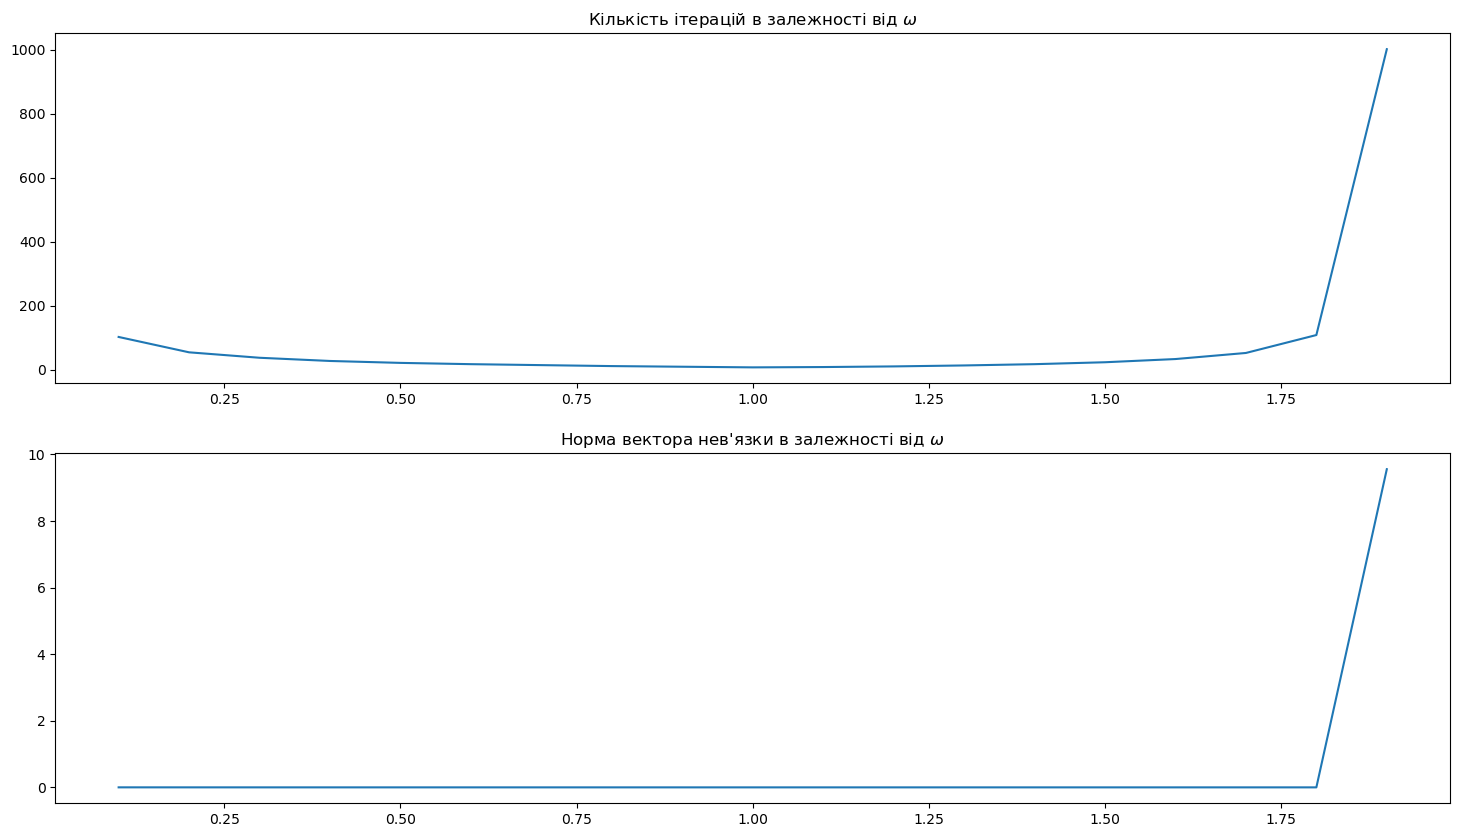

In [32]:
omega_arr = np.arange(0.1, 2, 0.1)

acc_arr = []
iter_arr = []

for omega in omega_arr:
    res, kk = relaxation_method(A, b, omega, 0.000001, output=False)
    acc = scp.linalg.norm(A.dot(res) - b)

    acc_arr.append(acc)
    iter_arr.append(kk)

fig, axs = plt.subplots(2, 1, figsize = (18, 10))

axs[0].plot(omega_arr, iter_arr)
axs[0].set_title("Кількість ітерацій в залежності від $\omega$")

axs[1].plot(omega_arr, acc_arr)
axs[1].set_title("Норма вектора нев'язки в залежності від $\omega$")


##### Бачимо, що найменше значення ітерацій отримуємо за $\omega$ в околі 1, а норма вектора нев'язки різко збільшується при $\omega$ > 1.8 через обмеження у кількості ітерацій (1000)
##### Розглянемо ті ж величини на діапазоні від 0.9 до 1.1

array([1.02, 1.03])

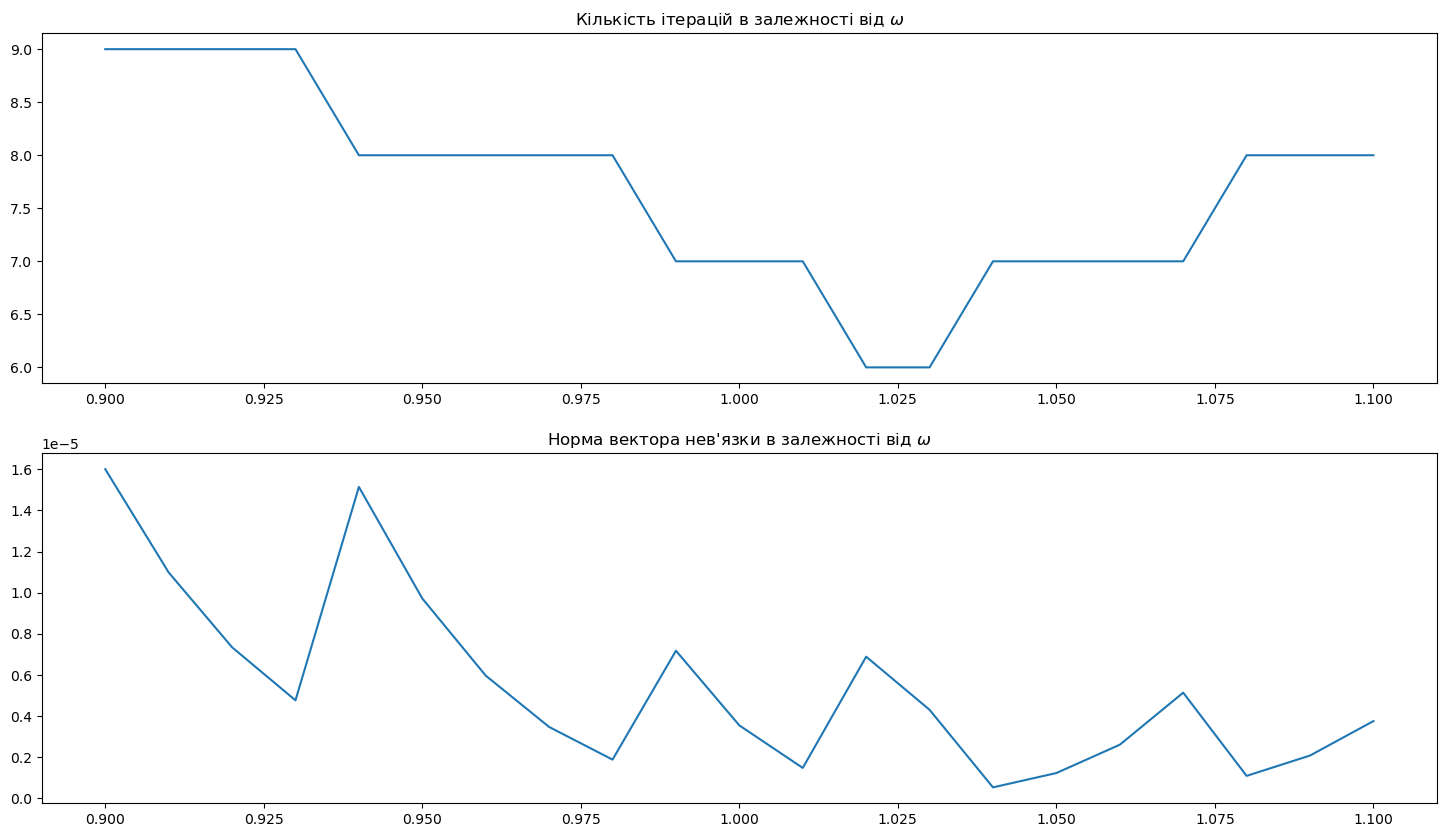

In [33]:
omega_arr = np.arange(0.9, 1.1, 0.01)

acc_arr = []
iter_arr = []

for omega in omega_arr:
    res, kk = relaxation_method(A, b, omega, 0.000001, output=False)
    acc = scp.linalg.norm(A.dot(res) - b)

    acc_arr.append(acc)
    iter_arr.append(kk)

fig, axs = plt.subplots(2, 1, figsize = (18, 10))

axs[0].plot(omega_arr, iter_arr)
axs[0].set_title("Кількість ітерацій в залежності від $\omega$")

axs[1].plot(omega_arr, acc_arr)
axs[1].set_title("Норма вектора нев'язки в залежності від $\omega$")

omega_arr[np.where(iter_arr == np.min(iter_arr))]



##### Бачимо, що найменша кількість ітерацій (6) досягається при значеннях $\omega \in [1.02, 1.04]$. Показово, що норма вектора нев'язка збільшується при цих значеннях $\omega$. Проте видно, що $\omega = 1.02$ є локальним максимумом.
##### Отже, найоптимальнішим значенням $\omega$ для методу верхньої релаксації є $\omega$ = 1.04. Оберемо інші початкові наближення

##### Розглянемо одиничний вектор початкового наближення

In [34]:
x_0 = np.ones_like(res)
res, kk = relaxation_method(A, b, 1.01, 0.000001, x_0)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 1.562413548770991 
x_1 = [ 0.07561488  0.10618889 -0.33057321 -0.56241355  0.16903806 -0.06744909]
Iter № 2 
eps_2 = 0.40028212047326023 
x_2 = [-0.02353085 -0.16216259  0.06970891 -0.51525864  0.10995264  0.11276254]
Iter № 3 
eps_3 = 0.09805895884726284 
x_3 = [-0.00407711 -0.06410363  0.09746933 -0.50160083  0.10224469  0.12222193]
Iter № 4 
eps_4 = 0.005082428072759805 
x_4 = [-0.00338667 -0.0590212   0.10069273 -0.50084086  0.10157687  0.12344226]
Iter № 5 
eps_5 = 0.0006950649242367241 
x_5 = [-0.00326721 -0.05832614  0.10098809 -0.50073946  0.10150752  0.12355031]
Iter № 6 
eps_6 = 5.979995892641671e-05 
x_6 = [-0.00325768 -0.05826634  0.10101794 -0.50073068  0.10150088  0.12356139]
Iter № 7 
eps_7 = 6.222404840584839e-06 
x_7 = [-0.00325665 -0.05826011  0.10102083 -0.50072977  0.10150023  0.12356246]
Iter № 8 
eps_8 = 5.953427378233012e-07 
x_8 = [-0.00325656 -0.05825952  0.10102112 -0.50072968  0.10150016  0.12356256]
Result: [-0.00325656 -0.05825952  0.10102

##### Кількість ітерацій при даному початковому наближенні менша, порівнюючи із методом Зейделя

##### Перевіримо для $x_0 = 0$

In [35]:
x_0 = np.zeros_like(res)
res, kk = relaxation_method(A, b, 1.01, 0.000001, x_0)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')

Iter № 1 
eps_1 = 0.5045600481224619 
x_1 = [-0.01533401 -0.10710381  0.1358464  -0.50456005  0.09678784  0.13955288]
Iter № 2 
eps_2 = 0.057982930591504146 
x_2 = [-0.0014477  -0.04912088  0.10342412 -0.49940802  0.10081523  0.12437707]
Iter № 3 
eps_3 = 0.008711618504998984 
x_3 = [-0.00320029 -0.0578325   0.10130473 -0.50066618  0.10144205  0.12367013]
Iter № 4 
eps_4 = 0.00036543828476792717 
x_4 = [-0.00324592 -0.05819794  0.10104693 -0.5007207   0.10149407  0.123572  ]
Iter № 5 
eps_5 = 5.630909147488067e-05 
x_5 = [-0.00325572 -0.05825425  0.10102376 -0.50072891  0.10149957  0.12356355]
Iter № 6 
eps_6 = 4.6591900767223304e-06 
x_6 = [-0.00325645 -0.05825891  0.1010214  -0.50072959  0.1015001   0.12356267]
Iter № 7 
eps_7 = 4.936783440240289e-07 
x_7 = [-0.00325654 -0.0582594   0.10102117 -0.50072966  0.10150015  0.12356258]
Result: [-0.00325654 -0.0582594   0.10102117 -0.50072966  0.10150015  0.12356258]
Expected: [-0.00325654 -0.05825945  0.10102115 -0.50072967  0.10150015  0.

##### Кількість ітерацій для цього початкового наближення не відрізняється від метода Зейделя
##### Розглянемо "поганий варіант" початкового наближення

In [36]:
x_0 = np.ones_like(res) * 300
res, kk = relaxation_method(A, b, 1.01, 0.000001, x_0)
print(f'Result: {res}\nExpected: {scp.linalg.solve(A, b)}\nIter quantity {kk}')


Iter № 1 
eps_1 = 439.7900371316349 
x_1 = [  27.26933198   63.88070642 -139.79003713  -17.86061024   21.77185304
  -61.96103711]
Iter № 2 
eps_2 = 129.77889870743286 
x_2 = [ -6.62639129 -33.96163262 -10.01113842  -5.25459562   2.84203803
  -3.35998443]
Iter № 3 
eps_3 = 32.02246158717354 
x_3 = [-0.26624607 -1.93917103 -1.04931555 -0.78106142  0.34223496 -0.31079042]
Iter № 4 
eps_4 = 1.6339944689735537 
x_4 = [-0.04547183 -0.30517656 -0.00521204 -0.53676863  0.12633436  0.08465077]
Iter № 5 
eps_5 = 0.22535589562200853 
x_5 = [-0.00670245 -0.07982067  0.09032056 -0.50389598  0.10388453  0.11959138]
Iter № 6 
eps_6 = 0.019333085510864427 
x_6 = [-0.00362404 -0.06048758  0.09998321 -0.50105601  0.10173627  0.12317948]
Iter № 7 
eps_7 = 0.0020143312770378244 
x_7 = [-0.00329135 -0.05847325  0.10091883 -0.50076102  0.10152322  0.12352472]
Iter № 8 
eps_8 = 0.00019262009099962896 
x_8 = [-0.00326001 -0.05828063  0.10101113 -0.50073277  0.10150242  0.12355887]
Iter № 9 
eps_9 = 1.91075017

##### Кількість ітерацій для цього початкового наближення не відрізняється від методу Зейделя
##### Отже, хоча ми й обрали $\omega$ при якому за стандартного початкового наближення метод верхньої релаксації має найменшу кількість ітерацій, для інших протестованих початкових наближень кількість ітерацій, в більшості випадків, не відрізняеться тієї, яка була при використанні методу Зейделя

## Висновки

##### Під час виконання роботи я придбав практичні навички в застосуванні чисельних методів розв’язання систем лінійних алгебраїчних рівнянь, визначенні трудомісткості застосованих методів і швидкості збіжності ітераційного процесу, проведення порівняльного аналізу щодо обрання кращого методу розв’язання.